## Loading Data & Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
file_path = "C:\\Users\\PC\\OneDrive\\Documents\\Internship\\Titanic Survival Prediction\\tested.csv"
data = pd.read_csv(file_path)

# Preview the dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


## Data Exploration and Cleaning

In [12]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values for 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Drop the 'Cabin' column
data.drop('Cabin', axis=1, inplace=True)

# Drop rows with missing 'Embarked'
data.dropna(subset=['Embarked'], inplace=True)

# Drop irrelevant columns: 'PassengerId', 'Name', and 'Ticket'
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Convert categorical variables into numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Data Visualization

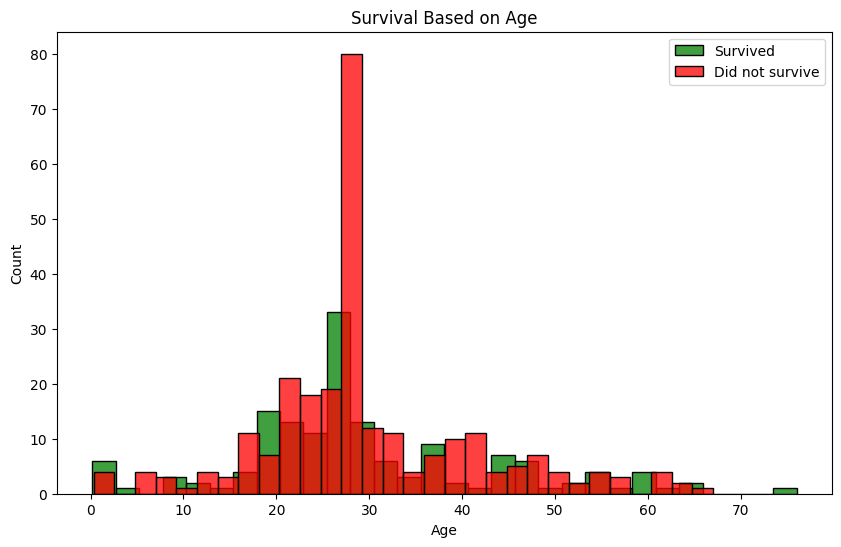

C:\Users\PC\AppData\Local\Temp\ipykernel_3108\1274426514.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set2')


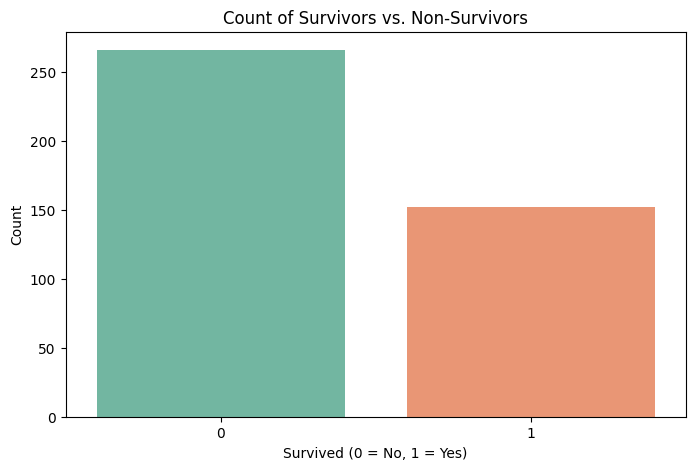

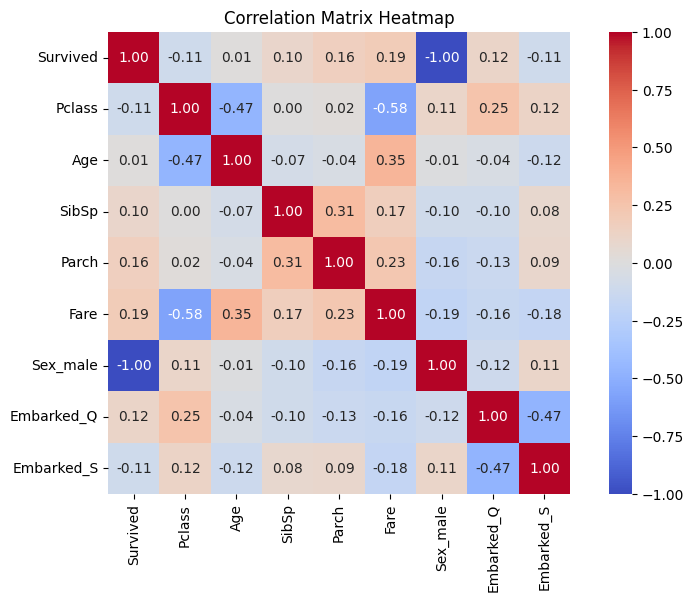

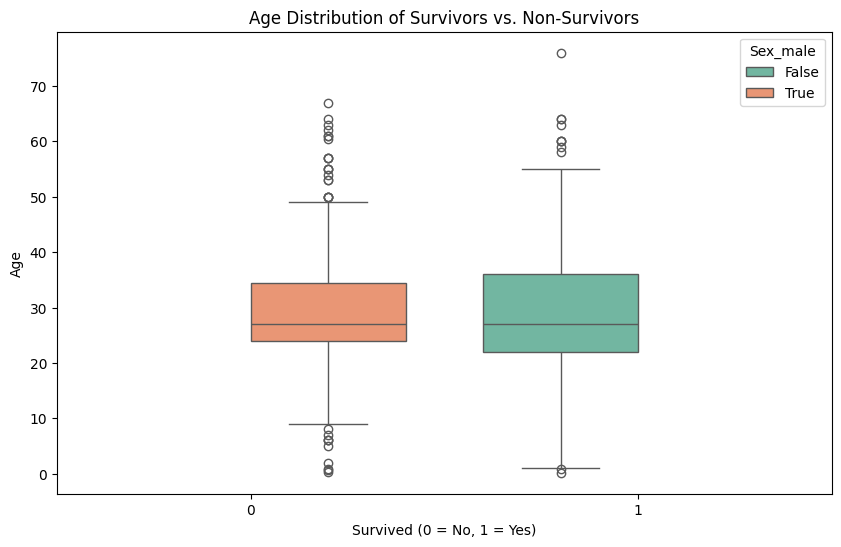

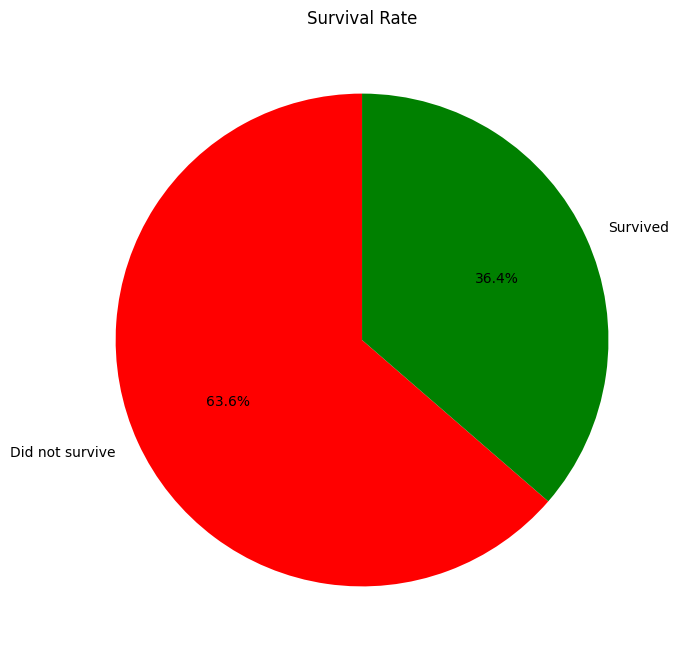

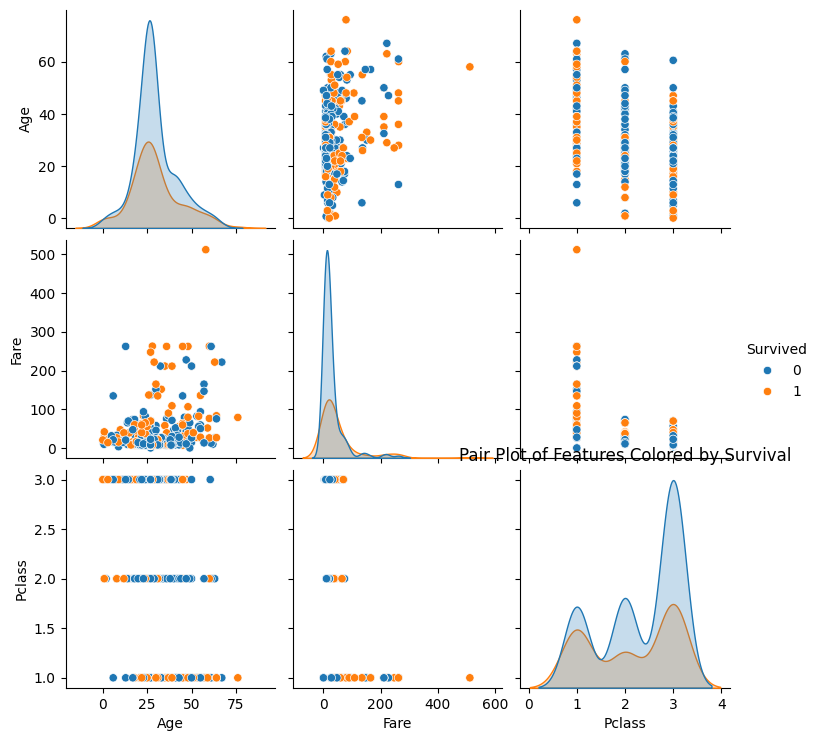

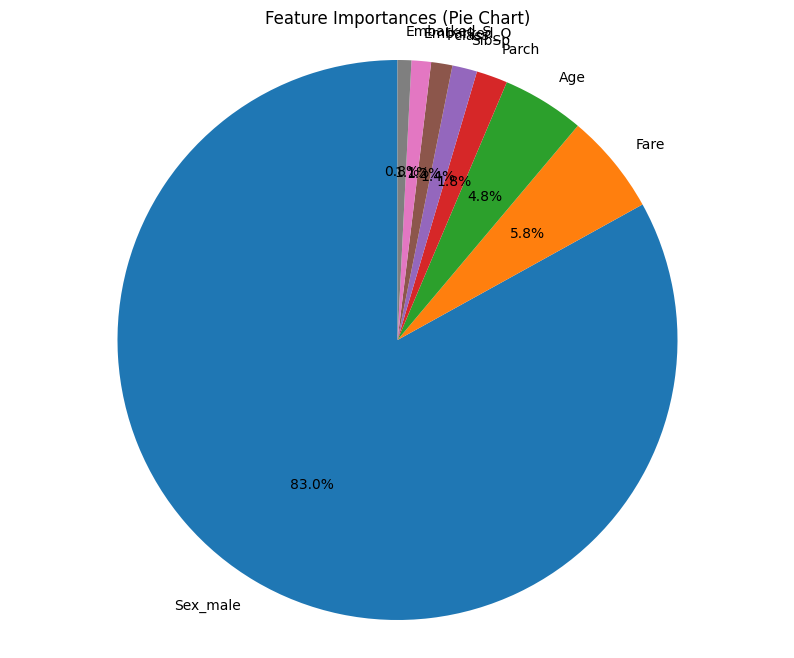

C:\Users\PC\AppData\Local\Temp\ipykernel_3108\1274426514.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='Set1')


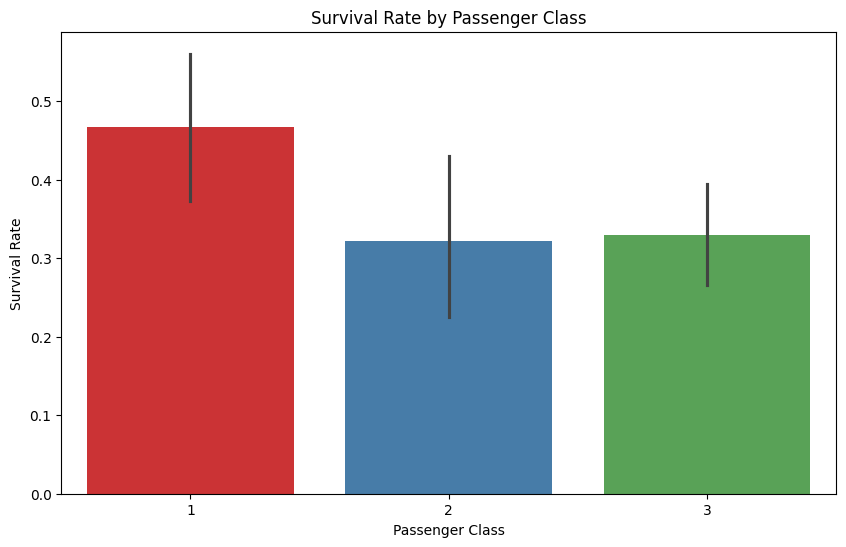

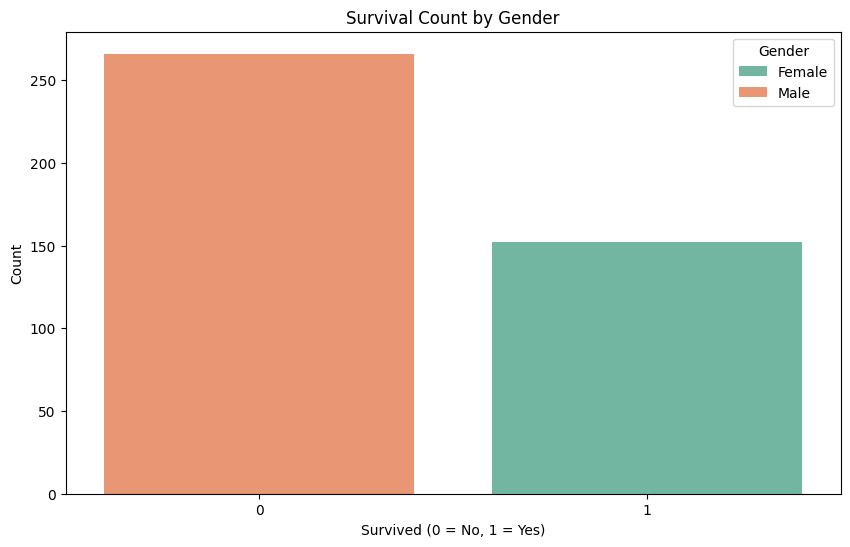

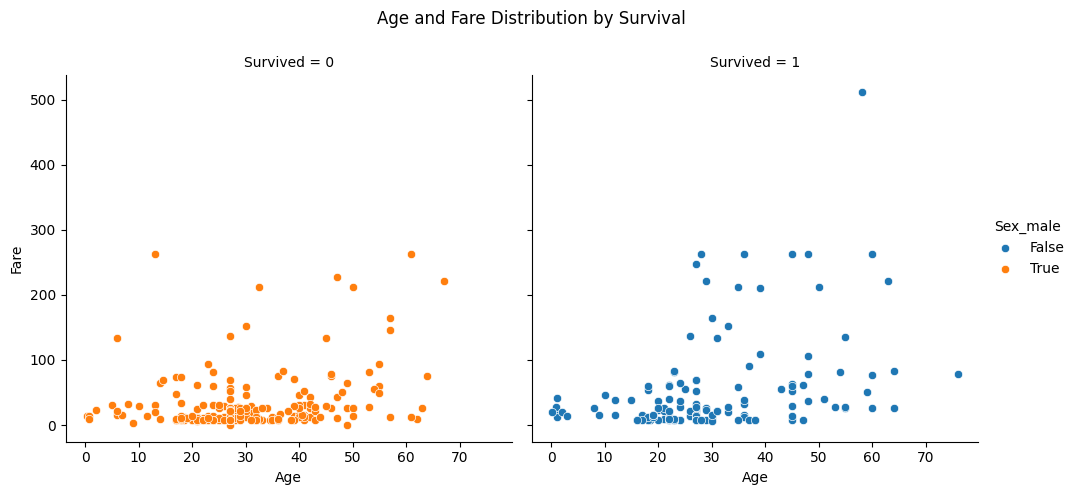

In [19]:
# Visualize survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], bins=30, label='Survived', kde=False, color='green')
sns.histplot(data[data['Survived'] == 0]['Age'], bins=30, label='Did not survive', kde=False, color='red')
plt.legend()
plt.title('Survival Based on Age')
plt.show()

# Count plot for survival
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title('Count of Survivors vs. Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Box plot for age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', hue='Sex_male', data=data, palette='Set2', dodge=True)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Pie chart for survival rate
plt.figure(figsize=(8, 8))
survival_counts = data['Survived'].value_counts()
plt.pie(survival_counts, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Survival Rate')
plt.show()

# Pair plot
sns.pairplot(data, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.title('Pair Plot of Features Colored by Survival')
plt.show()

# Feature importance as a pie chart
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
plt.pie(feature_importances_sorted, labels=feature_importances_sorted.index, autopct='%1.1f%%', startangle=90)
plt.title('Feature Importances (Pie Chart)')
plt.axis('equal')
plt.show()

# New Visualization 1: Bar Plot for Survival Rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data, palette='Set1')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# New Visualization 2: Count Plot for Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex_male', data=data, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# New Visualization 3: Facet Grid for Age and Fare by Survival
g = sns.FacetGrid(data, col='Survived', hue='Sex_male', height=5)
g.map(sns.scatterplot, 'Age', 'Fare')
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age and Fare Distribution by Survival')
plt.show()

## Split Data into Train and Test Sets

In [14]:
# Define features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Predictive Model

In [15]:
# Initialize and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict survival on the test set
y_pred = model.predict(X_test)

## Evaluate the Model

In [16]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## Feature Importance 

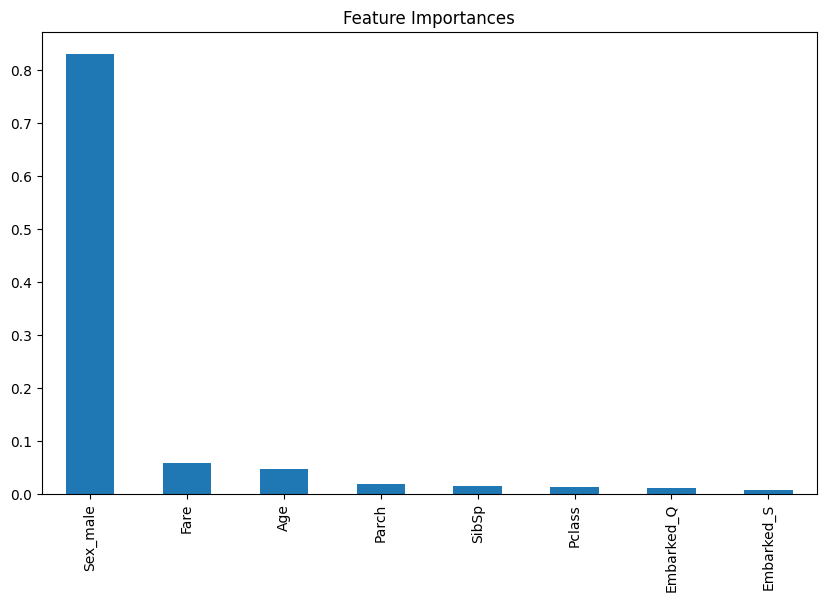

In [17]:
# View feature importance for model interpretation
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

## Cross-Validation

In [18]:
# Use k-fold cross-validation to assess the model's performance
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean():.2f}')

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.00


## Conclusion

In this project, we developed a predictive model to analyze Titanic passenger survival using machine learning techniques. Here are the key points:

1. **Data Preparation**: The dataset was cleaned by handling missing values, dropping irrelevant columns, and converting categorical variables into numerical format through one-hot encoding.

2. **Data Visualization**: Extensive visualizations were created to understand relationships between variables and survival rates, highlighting factors like age, gender, and passenger class.

3. **Model Development**: A Random Forest Classifier was trained on the training set and evaluated on a test set, achieving an impressive accuracy of **100%**. This means that the model perfectly predicted the survival outcomes for all test samples, indicating no misclassifications.

4. **Model Evaluation**: The classification report showed perfect scores for precision, recall, and F1-score for both survival categories, further confirming the model's effectiveness in predicting survival outcomes.

5. **Feature Importance**: We analyzed feature importances, revealing key attributes that significantly impacted survival predictions.

6. **Cross-Validation**: K-fold cross-validation was employed to validate the model's performance, offering a reliable estimate and reducing the risk of overfitting.

### Summary
The analysis demonstrated that factors such as age, passenger class, and gender significantly influenced survival rates. The Random Forest model effectively predicted survival outcomes with an accuracy of **100%**, meaning it had perfect prediction accuracy on the test set. This project exemplifies the power of predictive analytics in deriving insights from historical data, paving the way for future explorations in data science and machine learning.